# SID L3-Learning
## TD 2 Algorithmes stochastiques et apprentissage supervisé
### 2016-2017

###### Retour TD1 Coube ROC
On considère un problème d'apprentissage binaire (classification binaire). Où les données d'entrée sont à valeurs dans $\{A,B\}^3$. On observe $Y(A,A,A)=1$, $Y(B,B,A)=1$, $Y(A,B,A)=1$, $Y(A,A,B)=1$ $Y(B,A,B)=0$.  
<ol>
<li> Classer les trois configurations restantes par la méthode des $1$ plus proche voisin.</li>
<li> Utiliser la méthode du Jacknife pour évaluer la courbe ROC.</li>
<li> Reprendre les questions précédentes pour les $2$ plus proches voisins. </li>
<li> Quel voisinage choisir?
</ol>

###### Retour TD1 Régression linéaire 
Dans le modèle de régression linéaire de degré $0$ 
,$1$  et $2$ écrire les estimateurs des moindres carrés sous forme récursive. Proposer des estimateurs récursifs de la 
variance. Mettre en place numériquement ces estimateurs sur des données simulées. On considerera que $X$ suit une loi 
uniforme sur $[-1,+1]$ et que le bruit est gaussien de variance $1$.

###### Estimation récursive d'un quantile
Soit $(X_{n})$ une suite de variables aléatoires i.i.d. de fonction de répartition $F$ régulière et de densité $F'>0$.
Pour $\alpha\in]0,1[$, on note $\theta^{\alpha}$ le quantile d'ordre
$\alpha$ de la loi $F$: $F(\theta^{\alpha})=1-\alpha$. Afin d'estimer
récursivement $\theta^{\alpha}$ on 
utilise l'algorithme stochastique récursif:

$$\widehat{\theta}_{n+1}=\widehat{\theta}_{n}-\gamma_{n}
(\mathbb{1}_{\{X_{n+1}\leq\widehat{\theta}_{n}\}}-1+\alpha),$$

où $\widehat{\theta}_{0}$ est arbitraire et $(\gamma_{n})$ est une suite
décroissante positive non sommable et de carré sommable typiquement $1/n$.

<ol>

<li>On se place dans le cas où $F$ est la loi normale standard.
Etudier empiriquement à l'aide simulation la convergence et la loi de fluctuation de
la suite $(\widehat{\theta}_{n})$ dans le cas des trois quartiles.</li>

<li> Reprendre la question précédente en remplaçant la loi normale
par une loi exponentielle puis par la loi de Cauchy. </li>
</ol>
    

#### Systèmes de recommandation et algorithmes de bandits

##### Introduction :
Les **systèmes de recommandation automatiques** à très grande échelle sont aujourd'hui omniprésents sur internet : ouvrages conseillés à l'achat dans les librairies en ligne, articles recommandés sur les sites d'information, sans parler des cadres publicitaires qui financent l'essentiel de très nombreux sites aujourd'hui... 

Trouver la meilleure recommandation à faire à un visiteur peut être considéré comme un **"problème de bandits"** : il faut en même temps apprendre ses préférences, et utiliser les interactions déjà passées pour maximiser le nombre de recommandations suivies, tout en restant capable de gérer des flux de données très importants. 

Nous présentons ici quelques-uns des algorithmes les plus célèbres pour résoudre ce type de problèmes, et notamment l'algorithme **$\epsilon$-greedy**, l'algorithme **UCB** (Upper Confidence Bound), et l'algorithme **EXP3** (Exponential weights for Exploration and Exploitation). Leurs mérites respectifs sont soulignés et discutés, avec la présentation des résultats théoriques les plus importants les concernant. 

Nous montrons en outre comment expérimenter l'efficacité de ces méthodes pour la recommandation : ceci pose une difficulté particulière, car des jeux de données statiques rendent peu aisée l'évaluation de méthodes vouées à interagir avec des utilisateurs. Nous montrons en particulier comment mettre en place des expériences sur deux jeux de données célèbres : *movielens* et *jester*.

##### I. Systèmes de recommandation

Les **systèmes de recommandation (SR)** ont pour objectif de proposer à l’utilisateur des items (documents, objets, films, musiques, informations, etc.) susceptibles de l’intéresser. Deux approches principales sont mises en œuvre dans les SR : **le filtrage basé sur le contenu** recommande à un utilisateur des items similaires à ceux qu’il a déjà aimés par le passé et **le filtrage collaboratif** (FC) recommande les items appréciés par les utilisateurs qui ont auparavant fait des choix similaires à ceux de l’utilisateur. D’autres approches existent comme, par exemple, le filtrage démographique qui se base sur ce que l’on sait de l’utilisateur (âge, données démographiques, sexe, etc.) ; le filtrage communautaire qui utilise les décisions faites par les contacts de cet utilisateur (cette méthode est notamment utilisée dans les SR sociaux).

De nombreux SR recommandent à chaque instant plusieurs objets à un utilisateur simultanément; ils sont qualifiés de **SR à tirages multiples**. L’utilisateur peut choisir de sélectionner un ou plusieurs objets parmi ceux qui lui ont été recommandés. Les recommandations sélectionnées sont généralement considérées comme pertinentes. L’utilisateur peut ne pas sélectionner de recommandation dans la liste qui lui est proposée. Il s’agit d’un **abandon** qui correspond donc au cas où aucune des recommandations n’est sélectionnée par l’utilisateur. Dans le but d’optimiser les performances d’un SR, nous considérons le problème de la minimisation de l’abandon, particulièrement adapté à la recommandation à tirages multiples. Ce problème peut également être vu comme la maximisation du nombre de fois où les utilisateurs sélectionnent au moins un objet parmi ceux recommandés simultanément.


##### II. Modèles de bandits

Afin d’améliorer la pertinence des recommandations pour l’utilisateur courant, un SR peut considérer l’historique des interactions passées avec les utilisateurs. Pour cela, il convient de mettre en place **une stratégie permettant d’apprendre sur la pertinence des objets tout en continuant de recommander des objets pertinents**. Lorsque toutes les
données sont connues, il est possible d’estimer la pertinence des objets, c’est le cadre d’apprentissage supervisé (Hastie et al., 2009). Ce n’est pas un cadre réaliste pour un SR : de nouveaux utilisateurs et de nouveaux objets apparaissent continuellement. De plus, le choix des objets à recommander à chaque interaction est réalisé en fonction
des interactions passées. 

Un tel environnement s’inscrit dans le cadre de ce que l’on appelle **l’apprentissage par renforcement** (Sutton et Barto, 1999). Il s’agit d’implémenter une stratégie pour obtenir de nouvelles informations (exploration), tout en assurant que le SR recommande des objets pertinents (exploitation). Ce problème est connu sous le nom de **"dilemme exploration/exploitation"**. 


Les **modèles de bandit** sont connus pour offrir une première approche formelle à ce dilemme.
L'étude mathématique des problèmes de bandits remonte  à  l'article pionnier [1].  De  nombreux travaux  ont
suivi, notamment dans  le champ de l'apprentissage statistique, en relation avec la théorie des jeux, l'apprentissage actif, et l'agrégation d'estimateurs : on pourra par exemple  se référer à l'ouvrage de  référence [2].  Dans
cette littérature,  de nombreux problèmes tant  théoriques que computationnels
sont abordés,  en combinant théorie des probabilités  et optimisation convexe.
La   communauté  statistique   a  également   contribué,  notamment   sous  la
dénomination   d'*inférence  séquentielle* (voir [3,4] et les références citées), avec un point de vue essentiellement asymptotique.

Dans la version stochastique, la plus simple du problème, 

 - à chaque étape $t=1,2,\dots$ **l'agent choisit un bras** $A_t\in\{1,\dots,K\}$,
 - et **il reçoit une récompense** $X_t$ telle que, conditionnellement au choix des bras $A_1,A_2,\dots$, les récompenses soient indépendantes et identiquement distribuées, d'espérances $\mu_{A_1},\mu_{A_2},\dots$
 
On appelle *politique* la règle de décision (potentiellement randomisée) qui, aux observations passées $(A_1,X_1,\dots, A_{t-1}, X_{t-1})$, associe le prochain choix $A_t$. 

Le meilleur choix (inconnu de l'agent) est le bras $a^*$ qui correspond à la récompense moyenne maximale $\mu_{a^*}$. La performance d'une politique est mesurée par le **regret $R_n$**, qui est défini comme la différence moyenne entre les récompenses qu'elle permet d'accumuler jusqu'au temps $t=n$ et ce qui aurait pu être obtenu pendant la même période si  le meilleur bras était connu à l'avance~:
$$R_n = n \mu_{a^*} - \mathbb{E}\left[\sum_{t=1}^n X_t \right]\;.$$

Un algorithme de bandit ne peut pas être arbritrairement bon : il existe une **borne inférieure** au regret qu'il doit encourir dès lors qu'il offre des garanties uniformes de performance. 
La plus célèbre de ces bornes inférieures est celle de Lai et Robbins [6] (voir [7] pour une preuve moderne et plus générale). Dans le cas de récompenses binaires, elle stipule que si une 
politique assure dans tout environnement un regret sous-polynômial, alors celui-ci est **toujours au moins logarithmique** : quels que soient $\mu_1,\dots,\mu_K\in ]0,1[$, 
$$
  R_n \geq  \left(\sum_{a: \mu_a<\mu_{a^*}} \frac{\mu_{a^*}-\mu_a}{\mathrm{kl}\left( \mu_{a}, \mu_{a^*}\right)}\right)\;\log(n) \;\big(1-\mathrm{o}(1)\big),
$$

où $\mathrm{kl}$ désigne l'entropie binaire: $\mathrm{kl}(x,y = x\log(x/y) + (1-x)\log\big((1-x)/(1-y)\big)$.

##### III. Algorithmes de bandits

###### III.1 Politique  $\epsilon$-Greedy [9]

 A chaque instant $t$ :
   <ul>
    <li>Avec une probabilité de $1 - \epsilon_t$, recommander le document ayant le plus fort taux de clics estimé (<b>Exploitation</b>);
    <li>Avec une probabilité de $\epsilon_t$, recommander un document tiré selon une loi uniforme (<b>Exploration</b>). 
    </ul>


Epsilon-greedy : cas 2 bras suivant une loi de bernoulli, arm1 : 0.4, arm2: 0.3


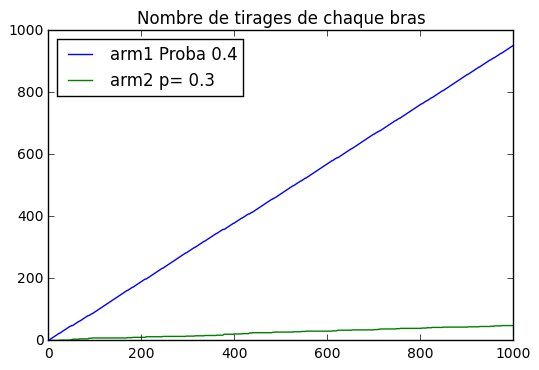

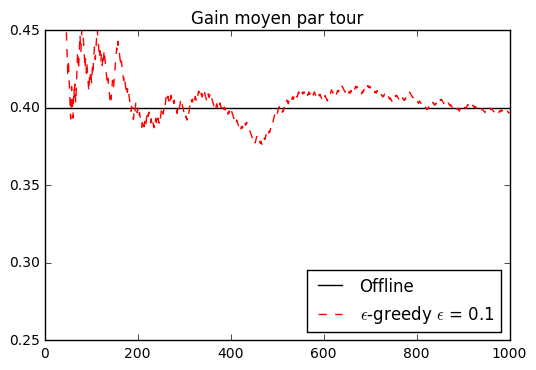

In [1]:
# Exemple epsilon-greedy algorithm

%matplotlib inline
from pylab import * 
import matplotlib.pyplot as pyplot
import re
import math
import random
import numpy


class EpsilonGreedy():
    def __init__(self, epsilon = 0.05, counts = [], values = [], n_arms = 0):
        """Récupère les paramètres spécifiés lors de la création d'un objet de cette classe"""
        self.epsilon = epsilon
        self.counts = [0 for col in range(n_arms)]
        self.values = [0.0 for col in range(n_arms)]
    
    def select_arm(self):
        """ Selectionne le bras avec la valeur la plus haute si random.random() > Epsilon, sinon choisi au hasard un bras""" 
        if sum(self.values) == 0:
            return int(random.random() * len(self.values))
        else:
            return self.values.index(max(self.values)) if random.random() > self.epsilon else int(random.random() * len(self.values))
        
    def update(self, chosen_arm, reward):
        """ Met à jour la liste self.values en fonction des rewards obtenus """
        self.counts[chosen_arm] += 1
        new_value = ((self.counts[chosen_arm] - 1) /float(self.counts[chosen_arm])) * self.values[chosen_arm] + (1 / float(self.counts[chosen_arm])) * reward
        self.values[chosen_arm] =  new_value
        

#Simulation part
def simulate_arm_bernoulli(proba):
    return 1 if random.random() < proba else 0

def bernoulli_epsilongreedy(nb_try, epsilon,  proba_arm_1, proba_arm_2):
    print "Epsilon-greedy : cas 2 bras suivant une loi de bernoulli, arm1 : %s, arm2: %s" % (proba_arm_1, proba_arm_2)

    algo = EpsilonGreedy(epsilon,[],[], 2)
    i = 0
    vector_arms_chosen = []
    reward_vect = []
    reward_cum = 0
    while i < nb_try :
        chosen_arm = algo.select_arm()
        vector_arms_chosen.append(chosen_arm)
        reward =  simulate_arm_bernoulli(proba_arm_1) if chosen_arm == 0 else simulate_arm_bernoulli(proba_arm_2)
        algo.update(chosen_arm, reward)
        reward_cum = reward_cum + reward
        if i != 0:
            reward_vect.append(reward_cum / float(i))
        else:
            reward_vect.append(0)
        i += 1
    return reward_vect, algo.values, algo.counts, vector_arms_chosen


#features
iteration_nb = 1000
arm_1_probability = 0.4
arm_2_probability = 0.3
epsilon = 0.1

#Simulation
rewards_vect, values, count, arms_chosen = bernoulli_epsilongreedy(iteration_nb, epsilon, arm_1_probability, arm_2_probability)
offline_solution = [max(arm_1_probability, arm_2_probability) for x in range(iteration_nb)]

#PLOTTING
cum_sum_arm_2 = cumsum(arms_chosen) #arm_chosen = 1 if arm2 selected, else arm_chosen = 0
cum_sum_arm_1 = [ x - cum_sum_arm_2[x] for x in range(iteration_nb)]
plot(range(iteration_nb),cum_sum_arm_1, range(iteration_nb), cum_sum_arm_2);
title("Nombre de tirages de chaque bras");
legend(["arm1 Proba %s" % arm_1_probability, "arm2 p= %s" % arm_2_probability], loc="upper left");
figure();

#plot
plot(range(iteration_nb), offline_solution, 'k-', range(iteration_nb), rewards_vect, 'r--');
axis([0,iteration_nb,0.25,0.45]);
title("Gain moyen par tour");
legend(["Offline",r"$\epsilon$-greedy $\epsilon$ = %s" % epsilon], loc="lower right");
    

Dans les expérimentations appliquées, il n'est pas rare de voir un choix $\epsilon_t=\epsilon$ constant. Il n'est cependant pas difficile de rendre le regret négligeable devant $n$, en choisissant une suite $(\epsilon_t)$ décroissant (pas trop vite) vers $0$.
Cependant, il n'est pas possible d'atteindre le regret asymptotiquement optimal suggéré par la borne de Lai et Robbins : cette politique paye donc sa grande simplicité par une performance moindre que ses concurrentes.

###### III.2 Politique UCB: Upper-Confidence Bound [10]

<ol>
    <li> Recommander une fois chaque document
    <li> A chaque instant $t > m$ :
    <ul>
        <li>Calculer la <b>borne supérieure de confiance associée</b> à chaque document <br/>
	$$ \hat{x_i} + \sqrt{\frac{2\ln t}{t_i}} $$ <br/>
        <ul>
              <li>où <b>$\hat{x_i}$</b> est la proportion de clics observée pour le document $i$
              <li>et <b>$t_i$</b> est le nombre de fois où le document $i$ a été recommandé
        </ul>
        <li>Recommander le document avec la borne supérieure de confiance associ\'ee la plus forte
   </ul>
</ol>

UCB1 : cas 2 arms, suivant une loi de bernoulli, arm1 : 0.5, arm2: 0.2


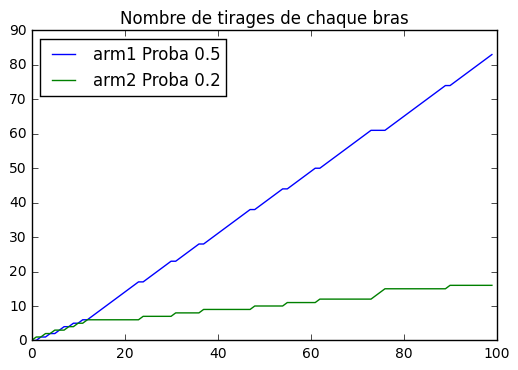

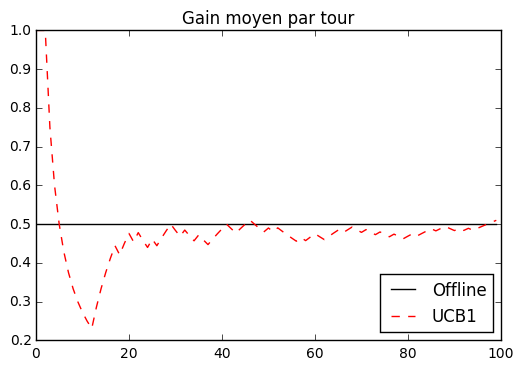

In [2]:
# Exemple UCB1 algorithm

class UCB1():
    def __init__(self, counts = [], values = [], n_arms = 0):
        self.counts = [0 for col in range(n_arms)]
        self.values = [0.0 for col in range(n_arms)]
        self.n_arms = n_arms
    
    def select_arm(self):
        """ Selectionne le bras avec la valeur de l'estimateur la plus haute"""
        for arm in range(self.n_arms):
            if self.counts[arm] == 0:
                return arm
            
        ucb_values = [0.0 for arm in range(self.n_arms)]
        total_counts = sum(self.counts)
        for arm in range(self.n_arms):
            bonus = math.sqrt((2 * math.log(total_counts)) / float(self.counts[arm]))
            ucb_values[arm] = self.values[arm] + bonus
        
        value_max = max(ucb_values)
        return ucb_values.index(value_max)
 

    
    def update(self, chosen_arm, reward):
        self.counts[chosen_arm] += 1
        n = self.counts[chosen_arm]
        value = self.values[chosen_arm]
        new_value = ((n - 1) /float(n)) * value + (1 / float(n)) * reward
        self.values[chosen_arm] =  new_value
        
        
#Simulation part
def bernoulli_UCB1(nb_try, proba_arm_1, proba_arm_2):
    print "UCB1 : cas 2 arms, suivant une loi de bernoulli, arm1 : %s, arm2: %s" % (proba_arm_1, proba_arm_2)
    vector_arms_chosen = []
    reward_vect = []
    reward_cum = 0
    algo = UCB1([],[], 2)
    
    i = 0
    while i < nb_try :
        chosen_arm = algo.select_arm()
        vector_arms_chosen.append(chosen_arm)
        if chosen_arm == 0 :
            reward = 1 if random.random() < proba_arm_1 else 0
        else:
            reward = 1 if random.random() < proba_arm_2 else 0
        algo.update(chosen_arm, reward)
        reward_cum = reward_cum + reward
        i += 1
        reward_vect.append(reward_cum / float(i))
    return reward_vect, algo.values, algo.counts, vector_arms_chosen



#features
iteration_nb = 100
arm_1_probability = 0.5
arm_2_probability = 0.2

#bandit algorithm
rewards_vect, values, count, arms_chosen = bernoulli_UCB1(iteration_nb, arm_1_probability, arm_2_probability)

offline_solution = [max(arm_1_probability, arm_2_probability) for x in range(iteration_nb)]

cum_sum_arm_2 = cumsum(arms_chosen) #arm_chosen = 1 if arm2 selected, else arm_chosen = 0
cum_sum_arm_1 = [x - cum_sum_arm_2[x] for x in range(iteration_nb)]
plot(range(iteration_nb),cum_sum_arm_1, range(iteration_nb), cum_sum_arm_2);
title("Nombre de tirages de chaque bras");
legend(["arm1 Proba %s" % arm_1_probability, "arm2 Proba %s" % arm_2_probability], loc="upper left");
figure();

#plot
plot(range(iteration_nb), offline_solution, 'k-', range(iteration_nb), rewards_vect, 'r--');
title("Gain moyen par tour");
legend(["Offline","UCB1"], loc="lower right");
    

Il est prouvé dans [10] une **borne de regret logarithmique** (non-asymptotique). Toutefois, l'algorithme ci-dessus a un comportement sous-optimal qui peut s'avérer assez décevant dans le cas (fréquent en recommandation) où les récompenses moyennes sont toutes très faibles (cela se conçoit bien : la borne de Hoeffding est alors très pessimiste). 

Heureusement, l'analyse peut être significativement renforcée, et [11] présente une variante pour laquelle une borne non-asymptotique de regret est montrée d'où peut être déduite l'**optimalité au sens de la borne de Lai et Robbins**.
Le calcul de la borne supérieure de confiance est un peu plus complexe, mais le gain de performance n'est pas seulement théorique. 

Les méthodes de type UCB présentent donc de grandes qualités ; elles posent toutefois des difficultés dans les modèles plus complexes (par exemple, dans le cas où les récompenses dépendent de façon non triviale de covariables) où il devient difficile de construire des intervalles de confiance précis avec les bonnes garanties non asymptotiques.
